<center><h1>Machine Learning Assignment</h1></center>
<center><h2>House Price Prediction</h2></center>

<font face = "Verdana" color = #0033a0>
<ul style="list-style-type:none;">
<li><b>Group Number:</b> 49</li>
<li><b>Members:</b></li>
<ol>
    <li>Binsu Elizabeth Varghese(2021c104187)</li>
    <li>Shehza Fathima (2021c104174)</li>
    <li>Nithin Krishnan (2021C104176)</li>
</ol>
</ul>
</font>

<h3>1.	Importing Libraries/Dataset</h3>

<h4>1.a) Importing Libraries</h4>

In [92]:
import pandas as pd
import seaborn as sns
import numpy as np

from prettytable import PrettyTable
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

<h4>1.b) Importing Dataset</h4>

In [2]:
# Importing Dataset of AmesHousing.csv put at same level as this file
df1 = pd.read_csv('AmesHousing.csv') 

<h3>2.	Data Exploration</h3>

<h4>2.a) Print 2 rows for sanity check</h4>

In [3]:
# Printing 2 rows with .head(2)
df1.head(2)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000


<h4>2.b) Class imbalance with appropriate visualization method</h4>

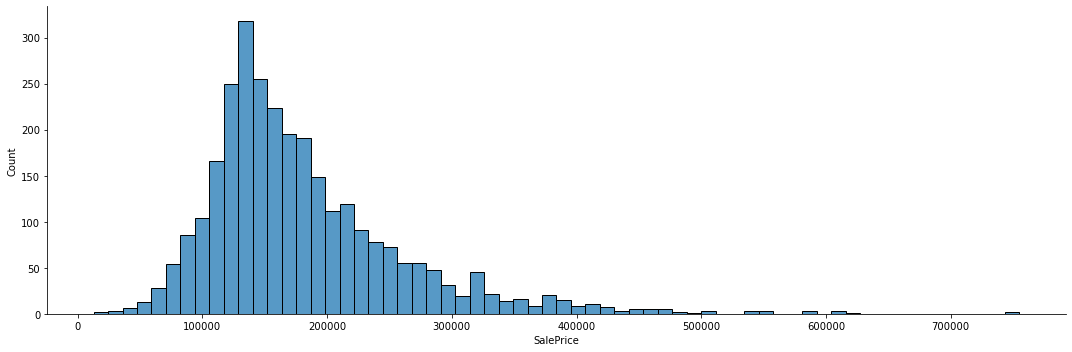

In [4]:
# Plotting Histogram of the class Variable "Sales Price"
sns.displot(df1['SalePrice'], height=5, aspect=3)

In [5]:
# Calculating mean of sales price attribute to assess imbalance
df1["SalePrice"].median()

160000.0

In [6]:
# Calculating median rounded to 2 decimal places of sales price attribute to assess imbalance
round(df1["SalePrice"].mean(), 2)

180796.06

<div><b>Explanation:</b></div>
<div>Above is the histogram plot of the class variable "SalePrice". From the histogram we can infer the fllowing points:</div>
<ol>
    <li>The class variable is left skewed visually from the histogram, means the class ariable has more data favoring the median value</li>
    <li>We cant see groups here, the data is bundled towards single median</li>
    <li>Comparing Mean and Median:</li>
        <ul>
            <li>The Mean value is 180796.06 and the median is 160000.0</li>
            <li>Median is less than mean hence the data is left skewed</li>
        </ul>
    <li>Looking at the histogram we can see outlier values too</li>
</ol>

<h3>3.Data Pre-processing and cleaning</h3>

<h4>3.a) Pre-processing of the data like identifying NULL or Missing Values</h4>

<h5>3.a.1) Exploring data</h4>

- <b>1. Data set Size Analysis: </b> Observing the size of data we get the dataset has 2930 rows and 82 columns or attributes

In [7]:
# Size of Original Data
df1.shape

(2930, 82)

- <b>2. Duplicate Rows Analysis: </b>Trying to figure out if the dataset has duplicate rows, but no duplicates found

In [8]:
# Identify duplicate rows
print("Duplicate Rows :", len(df1[df1.duplicated()]))

Duplicate Rows : 0


- <b>3. Missing Values Count Analysis: </b> Calculating total missing values, NaN values in the data sent, we find the value to be 13,997

In [9]:
df1.isna().sum().sum()

13997

<h5>3.a.2) Identifying Null Values and Missing Values</h5>

- <b>1. Identifying Row missing values: </b>Here we are listing The count of missing values for rowsmissing values</div>

In [10]:
df1.isna().sum().sum()

13997

- <b>2. Identifying Column missing values: </b>Here we are listing The count and percentage of missing values for columns having more than 1% missing values</div>

In [11]:
# Setting to not hide fields if count is more
pd.set_option('display.max_rows', None)

# Count the sum and percentage of missing fields
isNaCount = df1.isna().sum()
isnaPercent = (df1.isna().sum() * 100) / len(df1)

# Displaying the missing values as count and their corresponding % as a dataframe
anlys_dframe = pd.DataFrame({'Count': isNaCount, 'Percentage': round(isnaPercent, 2)})

# Sorting Values in dataframe and showing values where missing % > 1
anlys_dframe = anlys_dframe.sort_values(by='Percentage',ascending=False)
notableisNas = anlys_dframe.loc[anlys_dframe['Percentage'] > 0]

# Dislaying the dataframe neatly
display(notableisNas)

,Count,Percentage
Pool QC,2917,99.56
Misc Feature,2824,96.38
Alley,2732,93.24
Fence,2358,80.48
Fireplace Qu,1422,48.53
Lot Frontage,490,16.72
Garage Cond,159,5.43
Garage Finish,159,5.43
Garage Yr Blt,159,5.43
Garage Qual,159,5.43


<b>Smoothening Missing Vlaues:</b> Checking the unique values of the attributes to figure out how to fill these. For categorical we can fill by mode values ad for continuous attributes we will fill them by the mean values

In [12]:
# Creating a copy of dataset
# "Lot Frontage", "Garage Yr Blt", "Mas Vnr Area"
dfExplore = df1[["Fireplace Qu", "Garage Cond", "Garage Finish", "Garage Qual", "Garage Type", "Bsmt Exposure", "BsmtFin Type 2", "Bsmt Qual", "Bsmt Cond", "BsmtFin Type 1", "Mas Vnr Type"]].copy()

for column in dfExplore:

        # Lists all coloumns and unique value in them
        print(str(column) + ' : ' + str(dfExplore[column].unique()))

        # Diplays count of each value of the column
        print(dfExplore[column].value_counts())

        print("_________________________________________________________________")

Fireplace Qu : ['Gd' nan 'TA' 'Po' 'Ex' 'Fa']
Gd    744
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64
_________________________________________________________________
Garage Cond : ['TA' nan 'Fa' 'Gd' 'Ex' 'Po']
TA    2665
Fa      74
Gd      15
Po      14
Ex       3
Name: Garage Cond, dtype: int64
_________________________________________________________________
Garage Finish : ['Fin' 'Unf' 'RFn' nan]
Unf    1231
RFn     812
Fin     728
Name: Garage Finish, dtype: int64
_________________________________________________________________
Garage Qual : ['TA' nan 'Fa' 'Gd' 'Ex' 'Po']
TA    2615
Fa     124
Gd      24
Po       5
Ex       3
Name: Garage Qual, dtype: int64
_________________________________________________________________
Garage Type : ['Attchd' 'BuiltIn' 'Basment' 'Detchd' nan 'CarPort' '2Types']
Attchd     1731
Detchd      782
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: Garage Type, dtype: int64
____________________________

- <b>Observation: </b> 
    1. Form the above exploration, we find that the ""Fireplace Qu", "Garage Cond", "Garage Finish", "Garage Qual", "Garage Type", "Bsmt Exposure", "BsmtFin Type 2", "Bsmt Qual", "Bsmt Cond", "BsmtFin Type 1", "Mas Vnr Type" are categorical fields, hence we need to these by the Mode values as they are categorical variables
    2. "Lot Frontage", "Mas Vnr Area" are area values, hence for the houses that have  missing values in these we will fill by "0" indicating no area
    3. "Garage Yr Blt" values resemble that of the "Year built" column, hence the missing values can be replaced from those in the "Year Built" column assuming the garages are built along with the houses
    4. For the above exploration we observe that columns "Alley", "Misc Feature", "Pool QC", "Fence" has more than 80% missing values, hence it is worth removing these features from the dataset as they wont contribute much to the learning model
    5. For attributes "Bsmt Full Bath", "Bsmt Half Bath", "BsmtFin SF 1", "Garage Cars", "Electrical", "Total Bsmt SF", "Bsmt Unf SF", "BsmtFin SF 2", "Garage Area", figure out the rows that contain missing values in these attributes and delete them

- <b>Actions: </b> 
    1. Drop Columns, "Pool QC", "Misc Feature", "Alley", "Fence" as they contain more than 80% missing values
    2. Smoothen the categorical variables missing values by mode ("Fireplace Qu", "Garage Cond", "Garage Finish", "Garage Qual", "Garage Type", "Bsmt Exposure", "BsmtFin Type 2", "Bsmt Qual", "Bsmt Cond", "BsmtFin Type 1", "Mas Vnr Type")
    3. Fill the attributes having area "Lot Frontage", "Mas Vnr Area" with 0
    4. Fill the missing values in the "Garage Yr Blt" with "Year built"
    5. Delete rows containing missing values for "Bsmt Full Bath", "Bsmt Half Bath", "BsmtFin SF 1", "Garage Cars", "Electrical", "Total Bsmt SF", "Bsmt Unf SF", "BsmtFin SF 2", "Garage Area"
    6. Drop the "Order" and "PID" features as they are just ids and wont contribute to predicting value of sales price

<h5>3.a.2) Cleaning the data</h5>

- 1. Drop Columns, "Pool QC", "Misc Feature", "Alley", "Fence" as they contain more than 80% missing values

In [13]:
dfCleaned = df1.copy()

# Removing columns "Alley", "Misc Feature", "Pool QC", "Fence" having more than 80% missing values, 
dfCleaned.drop(["Alley", "Misc Feature", "Pool QC", "Fence"], axis = 1, inplace =True)


print(dfCleaned.shape)
print(dfCleaned.isna().sum().sum())

(2930, 78)
3166


- 2. Smoothen the categorical variables missing values by mode

In [14]:
dfCleaned["Fireplace Qu"].fillna("Gd", inplace=True)
dfCleaned["Garage Finish"].fillna("Unf", inplace=True)
dfCleaned["Garage Cond"].fillna("TA", inplace=True)
dfCleaned["Garage Type"].fillna("Attchd", inplace=True)
dfCleaned["Garage Qual"].fillna("TA", inplace=True)
dfCleaned["BsmtFin Type 2"].fillna("Unf", inplace=True)
dfCleaned["Bsmt Exposure"].fillna("No", inplace=True)
dfCleaned["Bsmt Cond"].fillna("TA", inplace=True)
dfCleaned["Bsmt Qual"].fillna("TA", inplace=True)
dfCleaned["Mas Vnr Type"].fillna("None", inplace=True)
dfCleaned["BsmtFin Type 1"].fillna("GLQ", inplace=True)

print(dfCleaned.shape)
print(dfCleaned.isna().sum().sum())

(2930, 78)
683


- 3. Fill the attributes having area "Lot Frontage", "Mas Vnr Area" with 0

In [15]:
dfCleaned["Mas Vnr Area"].fillna(0, inplace=True)
dfCleaned["Lot Frontage"].fillna(0, inplace=True)

print(dfCleaned.shape)
print(dfCleaned.isna().sum().sum())

(2930, 78)
170


- 4. Fill the missing values in the "Garage Yr Blt" with "Year built"

In [16]:
dfCleaned["Garage Yr Blt"].fillna(dfCleaned["Year Built"], inplace=True)

print(dfCleaned.shape)
print(dfCleaned.isna().sum().sum())

(2930, 78)
11


- 5. Delete rows containing missing values 

In [17]:
# dfMissingRows = df1[df1.isnull().any(axis=1)]
pd.set_option('display.max_columns', None)
dfMissingRows = dfCleaned.loc[dfCleaned["Bsmt Full Bath"].isna() | dfCleaned["Bsmt Half Bath"].isna() | dfCleaned["BsmtFin SF 1"].isna() | dfCleaned["Garage Cars"].isna() | dfCleaned["Electrical"].isna() | dfCleaned["Total Bsmt SF"].isna() | dfCleaned["Bsmt Unf SF"].isna() | dfCleaned["BsmtFin SF 2"].isna() | dfCleaned["Garage Area"].isna()]

display(dfMissingRows)
ordersWithMissVals = dfMissingRows['Order'].values.tolist()
print(ordersWithMissVals)

# dfCleaned = dfCleaned.drop(ordersWithMissVals, inplace = True)
dfCurated = dfCleaned[~dfCleaned['Order'].isin(['1342', '1498', '1578', '2237'])]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,903230120,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,Gd,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,0,4,2008,ConLD,Abnorml,79000
1497,1498,908154080,20,RL,123.0,47007,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,TA,TA,No,GLQ,0.0,Unf,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,0,7,2008,WD,Normal,284700
1577,1578,916386080,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,0,Gd,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,5,2008,WD,Normal,167500
2236,2237,910201180,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Gd,Detchd,1923.0,Unf,NaN,NaN,TA,TA,Y,174,0,212,0,0,0,0,3,2007,WD,Alloca,150909


[1342, 1498, 1578, 2237]


In [18]:
print(dfCurated.shape)
print(dfCurated.isna().sum().sum())

(2926, 78)
0


- 6. Dropping "Order" and "PID"

In [22]:
# Dropping the Order and PID columns as they are just id fields
dfCurated.drop(["Order", "PID"], axis = 1, inplace =True)

In [23]:
dfCurated.shape

(2926, 76)

- Hence we have now cleaned the dataset <b>"dfCurated"</b> and got missing values count as 0

<h3>4.Data Visualization and corelation Analysis</h3>

- From the cleaned data set let us now split them according to the type and plot histograms for contiuos variables and count plot for categorical variables. This will help us get better insight into the data

<h4>4.a) Data Visualizations</h4>

<h4>4.a.1) Identifying categorical and Continuous attributes</h4>

In [24]:
numericAttr = []
categoricalAttr = []

# Iterating over the attributes to get the type
for attribute in dfCurated.columns:
    
    # Seggagarating continuos variables
    if (dfCurated[attribute].dtype == "int64" or dfCurated[attribute].dtype == "float64"):
        numericAttr.append(attribute)
        
    # Segagarating categorical variables of type string
    if (dfCurated[attribute].dtype == "object"):
        categoricalAttr.append(attribute)

# Printing the variables list
print("Type: Categorical / Object")
print("Count:", len(categoricalAttr))
print("Attributes:", ", ".join(categoricalAttr))
print("---------------------------------------------")
print("Type: Continuous /  int64 / float64")
print("Count:", len(numericAttr))
print("Attributes:", ", ".join(numericAttr))
print("---------------------------------------------")


Type: Categorical / Object
Count: 39
Attributes: MS Zoning, Street, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2, Heating, Heating QC, Central Air, Electrical, Kitchen Qual, Functional, Fireplace Qu, Garage Type, Garage Finish, Garage Qual, Garage Cond, Paved Drive, Sale Type, Sale Condition
---------------------------------------------
Type: Continuous /  int64 / float64
Count: 37
Attributes: MS SubClass, Lot Frontage, Lot Area, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Mas Vnr Area, BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, TotRms AbvGrd, Fireplaces, Garage Yr Blt, Garage Cars,

<h4>4.a.2) Plotting count plots for Categorical variables</h4>

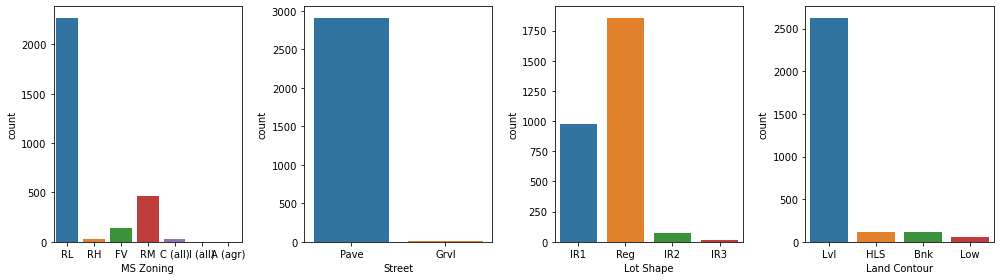

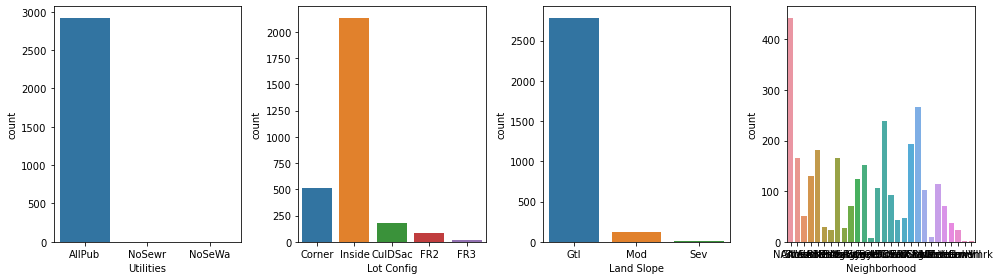

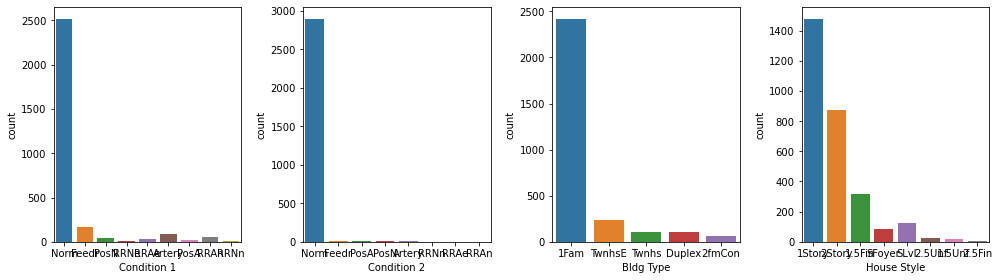

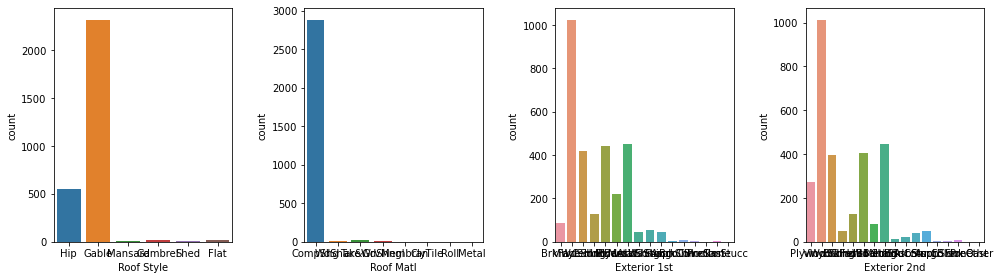

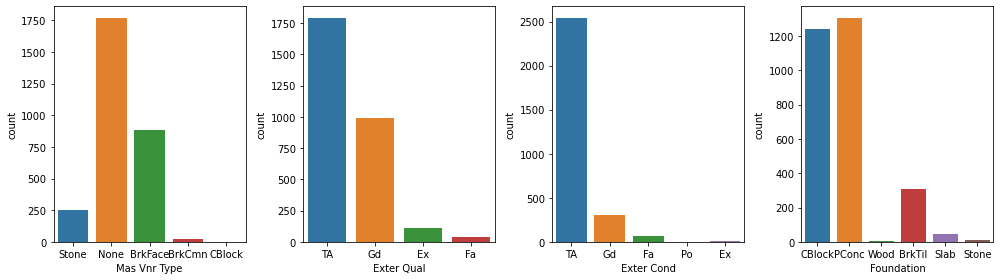

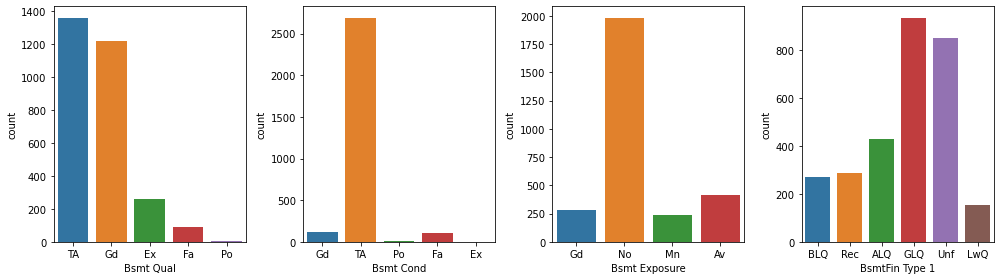

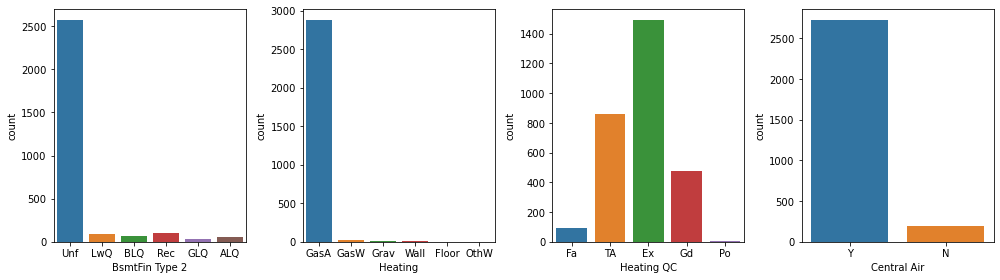

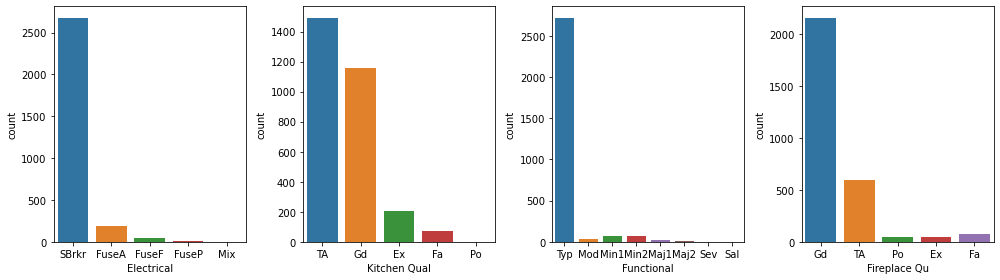

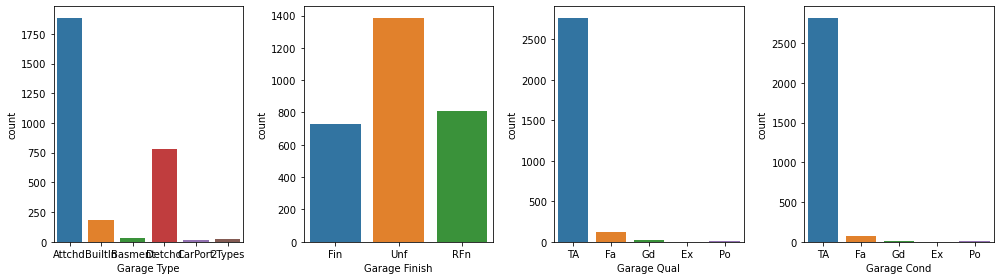

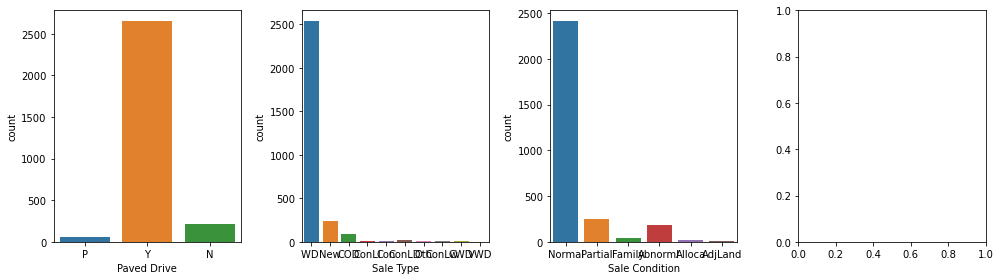

In [25]:
plt.rcParams["figure.figsize"] = [14.00, 4.0]
plt.rcParams["figure.autolayout"] = True

categoricalAttr = ["MS Zoning", "Street", "Lot Shape", "Land Contour", "Utilities", "Lot Config",
                   "Land Slope", "Neighborhood", "Condition 1", "Condition 2", "Bldg Type", "House Style",
                   "Roof Style", "Roof Matl", "Exterior 1st", "Exterior 2nd", "Mas Vnr Type", "Exter Qual",
                   "Exter Cond", "Foundation", "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1",
                   "BsmtFin Type 2", "Heating", "Heating QC", "Central Air", "Electrical", "Kitchen Qual",
                   "Functional", "Fireplace Qu", "Garage Type", "Garage Finish", "Garage Qual", "Garage Cond",
                   "Paved Drive", "Sale Type", "Sale Condition"]

index = 0
graphsInARow = 4

for attr in categoricalAttr:
    
    if (index % graphsInARow == 0):
        f, ax = plt.subplots(1, graphsInARow)
    
    # Using the seaborn countplot for categorical variable
    sns.countplot(x=attr, data=dfCurated, ax = ax[index % graphsInARow])
    index = index + 1
    
    # Shows multiple graohs in a row
    if (index % graphsInARow == 0):
        plt.show()


<h4>4.a.3) Plotting Histogram plots to understand distributions for Continuos variables</h4>

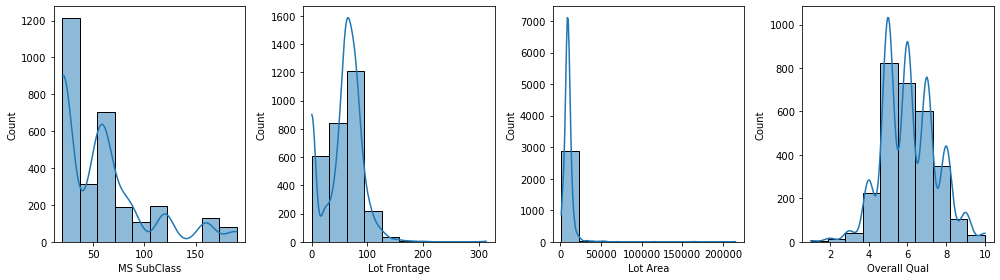

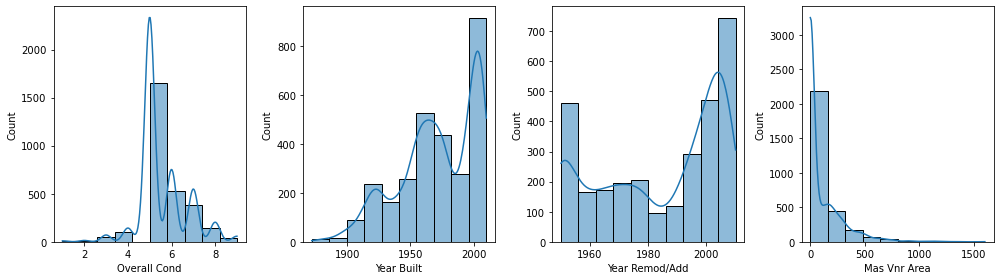

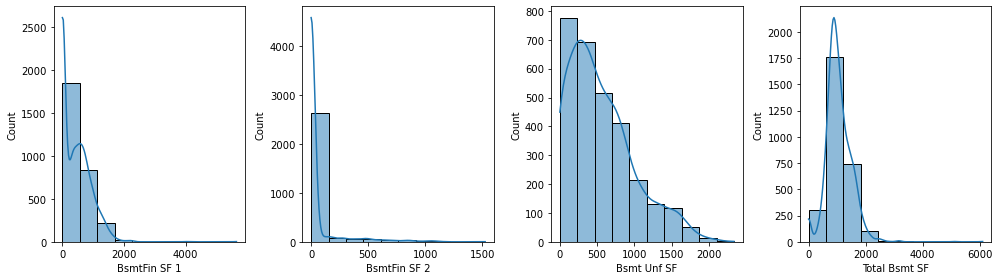

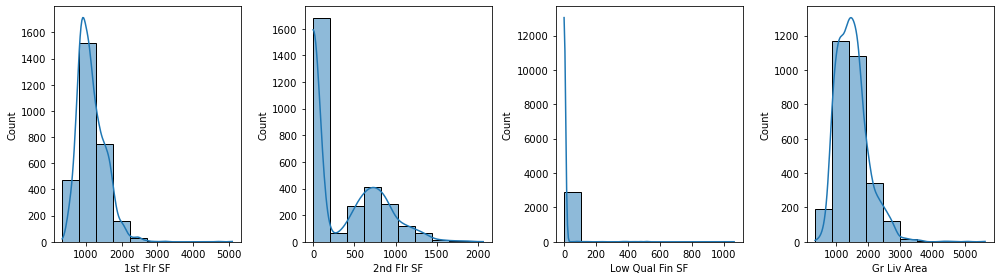

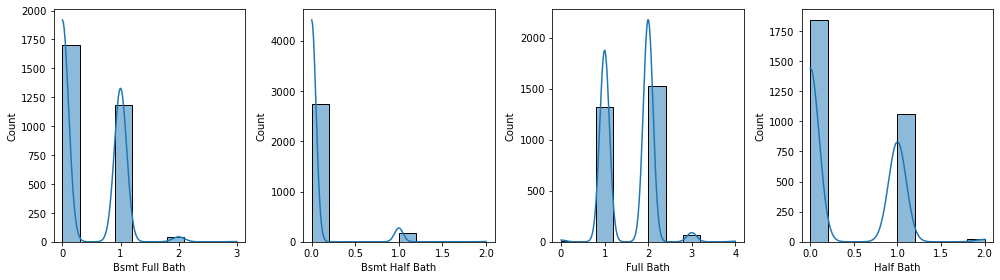

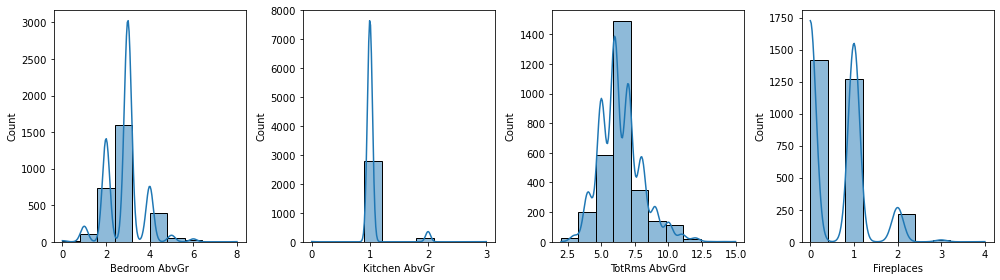

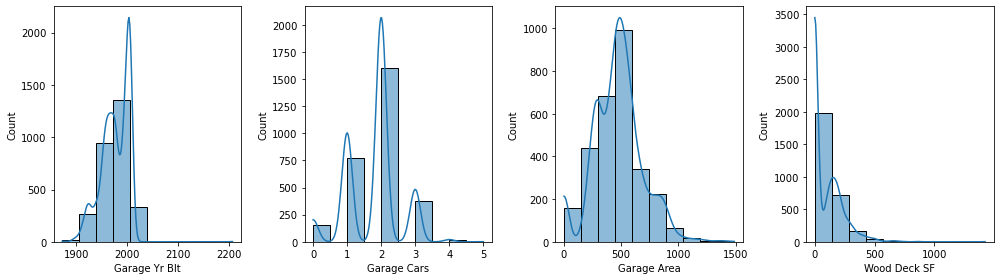

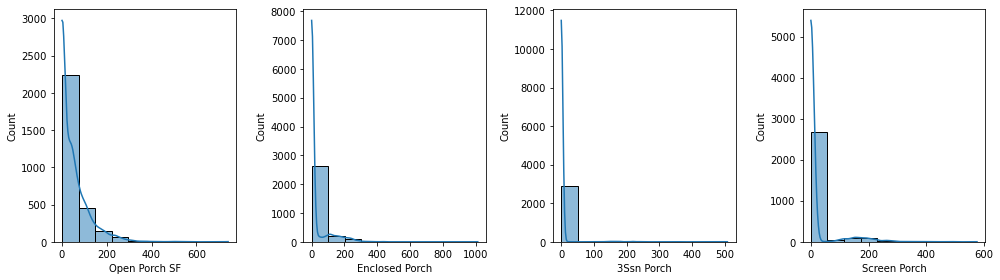

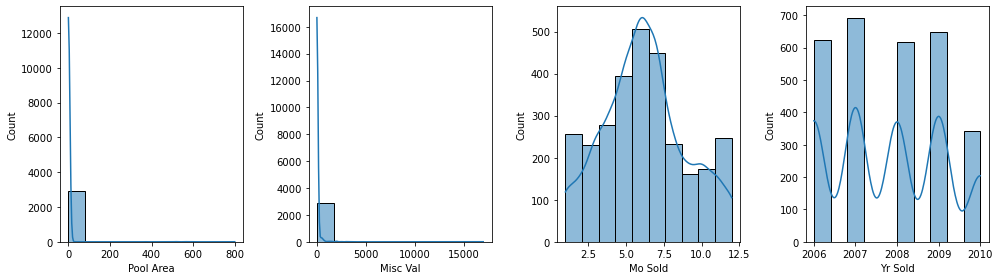

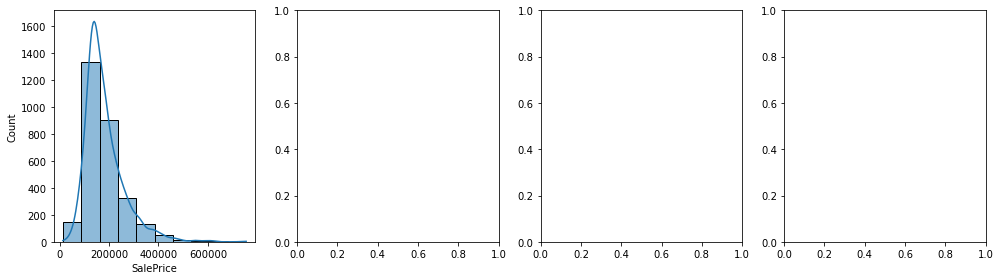

In [26]:
plt.rcParams["figure.figsize"] = [14.00, 4.0]
plt.rcParams["figure.autolayout"] = True

continuosAttr = ["MS SubClass", "Lot Frontage", "Lot Area", "Overall Qual", "Overall Cond",
                 "Year Built", "Year Remod/Add", "Mas Vnr Area", "BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF",
                 "Total Bsmt SF", "1st Flr SF", "2nd Flr SF", "Low Qual Fin SF", "Gr Liv Area", "Bsmt Full Bath",
                 "Bsmt Half Bath", "Full Bath", "Half Bath", "Bedroom AbvGr", "Kitchen AbvGr", "TotRms AbvGrd",
                 "Fireplaces", "Garage Yr Blt", "Garage Cars", "Garage Area", "Wood Deck SF", "Open Porch SF",
                 "Enclosed Porch", "3Ssn Porch", "Screen Porch", "Pool Area", "Misc Val", "Mo Sold", "Yr Sold",
                 "SalePrice"]

index = 0
graphsInARow = 4

# MonthlyIncome MonthlyRate

for attr in continuosAttr:
    if (index % graphsInARow == 0):
        f, ax = plt.subplots(1, graphsInARow)
    sns.histplot(data=dfCurated[attr], bins=10, kde=True, ax = ax[index % graphsInARow])
    index = index + 1
    if (index % graphsInARow == 0):
        plt.show()


<h4>4.b) Correlational Analysis</h4>

- Performing corelation Analysis to find out the fields that are interdependent

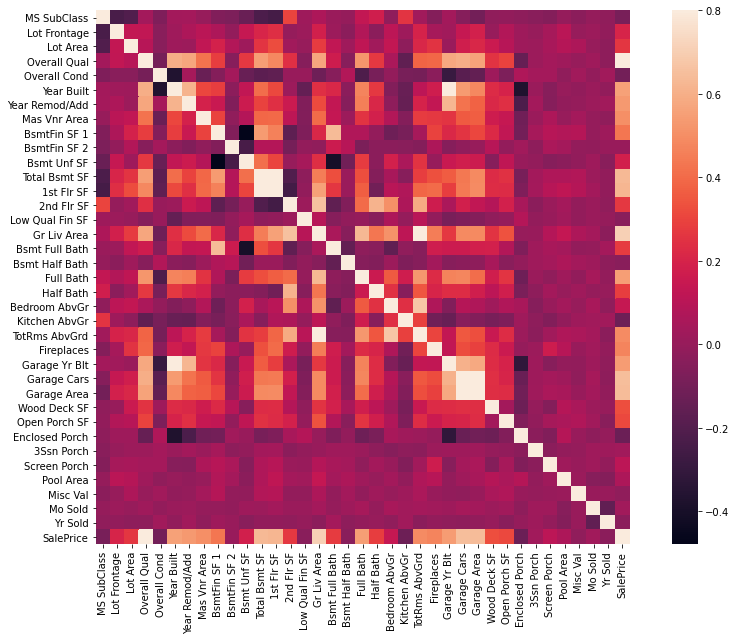

In [27]:
# Copying the dataset
dfCorrelation = dfCurated.copy()

# Performing corelation Analysis
corrMatrix = dfCurated.corr()

# Plotting results as a heat map
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrMatrix, vmax=.8, square=True)

<h4>4.b.1) Features having high corelation among themseleves</h4>

In [28]:
correlatedFeatures = []

for i in range(len(corrMatrix.columns)):
    for j in range(i):
        if abs(corrMatrix.iloc[i, j]) > 0.8:
            colname = corrMatrix.columns[i]
            correlatedFeatures.append(colname)

print(correlatedFeatures)

['1st Flr SF', 'TotRms AbvGrd', 'Garage Yr Blt', 'Garage Area']


<h4>4.b.2) Features having high corelation wrt target variable</h4>

In [29]:
# Creating a new data frame with the corelation values
corr_dframe = pd.DataFrame({'Corelation': dfCorrelation[dfCorrelation.columns[1:]].corr()['SalePrice'][:].sort_values()})
corr_dframe.drop(['SalePrice'], axis = 0, inplace = True) 

# Filter attributes with correlation values greater than 0.5 and less that -0.5
relatedDF = corr_dframe.loc[abs(corr_dframe['Corelation']) >= 0.5]

# Displaying the results
display(relatedDF)

,Corelation
Mas Vnr Area,0.502505
Year Remod/Add,0.532906
Garage Yr Blt,0.540826
Full Bath,0.545314
Year Built,0.558888
1st Flr SF,0.623731
Total Bsmt SF,0.634287
Garage Area,0.640199
Garage Cars,0.647822
Gr Liv Area,0.707492


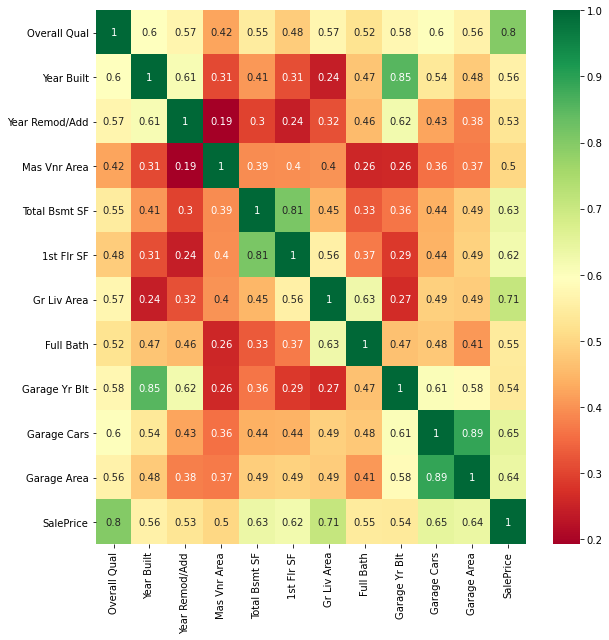

In [30]:
corrmat = dfCurated.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(9,9))
g = sns.heatmap(dfCurated[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<b>Analysis:</b>
- Features: '1st Flr SF', 'TotRms AbvGrd', 'Garage Yr Blt', 'Garage Area', 'Yr Sold', 'SalePrice' <b>have high level of corelation > 0.8</b>
- Features: 'Mas Vnr Area', 'Year Remod/Add', 'Garage Yr Blt', 'Full Bath', 'Year Built', '1st Flr SF', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', 'Gr Liv Area', 'Overall Qual' <b>have good corelation > 0.5 with the target variable Sales Price</b>

<b>Effect On Feature Selection</b>
- Correlation Analysis takes only the numeric attribites into consideration
- The categorical features are not considered hence the model performance may be affected if we go ahead with the features selected by correlation alone

<h3>5. Feature Engineering</h3>

<h4>5.a) Feature Engineering Techniques that we will be using are:</h4>

- Label encoding
- Normalization

<b>Reason for Selection:</b>
- Models do not work directly with categorical variables unless they are encoded, the ML algorithms will ignore the categorical variable, hence we need to use the Transformation technique of Label encoding to assign numeric values to the categorical variables hence we go for <b>Label Encoding</b>
- We need to normalize the numerical values so that the data values corresponding to all the features lie in the 0 to 1 range to make the prediction more effective and accurate, hence we go for the min max scaler for <b>Normalization</b>

<h4>5.a.1) Label Encoding:</h4>

As part of label encoding we will convert the categorial string attributes to numeric type so that is helpful in feature engineering and model building. For this we will Convert categorical attributes by Label Encoder

<h4>5.a.1.1) Before Label Encoding:</h4>

In [31]:
# Preparing copy of the Dataset
dfFEd = dfCurated.copy()

# Printing the values before label encoding
dfCurated.head(2)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Gd,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000


<h4>5.a.1.2) After Label Encoding:</h4>

In [32]:
# Encoding categorical into numerical values
for column in dfFEd.columns:
        if dfFEd[column].dtype == 'object':
            dfFEd[column] = LabelEncoder().fit_transform(dfFEd[column])

# Displaying the fist two rows of the encoded dataset
dfFEd.head(2)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,5,141.0,31770,1,0,3,0,0,0,15,2,2,0,2,6,5,1960,1960,3,1,3,10,4,112.0,3,4,1,4,2,1,1,639.0,5,0.0,441.0,1080.0,1,1,1,4,1656,0,0,1656,1.0,0.0,1,0,3,1,4,7,7,2,2,1,1960.0,0,2.0,528.0,4,4,1,210,62,0,0,0,0,0,5,2010,9,4,215000
1,20,4,80.0,11622,1,3,3,0,4,0,15,1,2,0,2,5,6,1961,1961,1,1,13,14,3,0.0,3,4,1,4,4,3,4,468.0,3,144.0,270.0,882.0,1,4,1,4,896,0,0,896,0.0,0.0,1,0,2,1,4,5,7,0,2,1,1961.0,2,1.0,730.0,4,4,2,140,0,0,0,120,0,0,6,2010,9,4,105000


- We see that the categorical values have now been encoded to numeric values

<h4>5.a.2) Normalization:</h4>
- Deals with converting the data into a normalised scale so that it is easy to process it further. And the result we can see the normalized data

In [33]:
# Creating copy of label encoded dataset
dfFENorm = dfFEd.copy()

# Using Min Max Scaler
min_max_scaler = MinMaxScaler()
min_max_scaled = min_max_scaler.fit_transform(dfFENorm)

# Creating new Data frame with the scaled value
dfFENormalized = pd.DataFrame(min_max_scaled, columns = dfFENorm.columns)

# Printing the top 2 rows of normalized dataset
dfFENormalized.head(2)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0.0,0.833333,0.450479,0.142420,1.0,0.0,1.0,0.0,0.0,0.0,0.555556,0.250,0.285714,0.0,0.285714,0.555556,0.500,0.637681,0.166667,0.6,0.142857,0.200000,0.625,1.00,0.07,1.0,1.0,0.2,1.0,0.5,0.333333,0.2,0.113218,1.0,0.000000,0.188784,0.176759,0.2,0.25,1.0,1.0,0.277673,0.0,0.0,0.249058,0.333333,0.0,0.25,0.0,0.375,0.333333,1.0,0.384615,1.0,0.5,0.5,0.2,0.262687,0.0,0.4,0.354839,1.0,1.0,0.5,0.147472,0.083558,0.0,0.0,0.000000,0.0,0.0,0.363636,1.0,1.0,0.8,0.272444
1,0.0,0.666667,0.255591,0.048246,1.0,1.0,1.0,0.0,1.0,0.0,0.555556,0.125,0.285714,0.0,0.285714,0.444444,0.625,0.644928,0.183333,0.2,0.142857,0.866667,0.875,0.75,0.00,1.0,1.0,0.2,1.0,1.0,1.000000,0.8,0.082920,0.6,0.094364,0.115582,0.144354,0.2,1.00,1.0,1.0,0.118042,0.0,0.0,0.105878,0.000000,0.0,0.25,0.0,0.250,0.333333,1.0,0.230769,1.0,0.0,0.5,0.2,0.265672,1.0,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.0,0.454545,1.0,1.0,0.8,0.124238


<h3>6. Building the model</h3>

<h4>6.a) Splitting the Training and test Dataset:</h4>

<h4>6.a.1) Extracting the Target variable as Y and predictor variables as X:</h4>

In [34]:
# Extracting the target variable as y and other variable determinign the target as X
X_norm = dfFENormalized.iloc[:, :-1]
Y_norm = dfFENormalized.iloc[:, -1:]


ptbl = PrettyTable()
ptbl.field_names = ["Dataset", "Shape"]
ptbl.add_row(['Normalised Dataset', dfFENormalized.shape])
ptbl.add_row(['X: Predictor', X_norm.shape])
ptbl.add_row(['Y: Outcome', Y_norm.shape])
print(ptbl)

+--------------------+------------+
|      Dataset       |   Shape    |
+--------------------+------------+
| Normalised Dataset | (2926, 76) |
|    X: Predictor    | (2926, 75) |
|     Y: Outcome     | (2926, 1)  |
+--------------------+------------+


<h4>6.a.2) Splitting train and test data</h4>

<b>Reason</b> It is a recommended split to go for 75-25 split meaning 75% records being used to train the model and 25% records to test the model.
- If we reduce the training size that may lead to the model not learning properly from the given data and in essence will lead to wrong predictions.
- If we go for more training records and lesser test records for modelling the data, it will lead to overfitting of the model.

Hence we go for a 75-25 split, the recommended split

In [135]:
x_train, x_test, y_train, y_test = train_test_split(X_norm, Y_norm, test_size = 0.25, random_state = 0)

ptbl = PrettyTable()
ptbl.field_names = ["Dataset", "Shape"]
ptbl.add_row(['x_train', x_train.shape])
ptbl.add_row(['y_train', y_train.shape])
ptbl.add_row(['x_test', x_test.shape])
ptbl.add_row(['y_test', y_test.shape])
print(ptbl)

+---------+------------+
| Dataset |   Shape    |
+---------+------------+
| x_train | (2194, 75) |
| y_train | (2194, 1)  |
|  x_test | (732, 75)  |
|  y_test |  (732, 1)  |
+---------+------------+


<h4>6.b) Building the linear regression model:</h4>

In [136]:
# Traingin the Linear Regression Model
lrModel = LinearRegression()
lrModel.fit(x_train, y_train)

# Predicting the values from tarin and test set
y_test_pred = lrModel.predict(x_test)
y_train_pred = lrModel.predict(x_train)

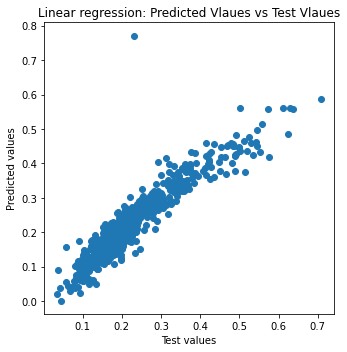

In [137]:
# Plot test vs predictions
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_test_pred)
plt.title("Linear regression: Predicted Vlaues vs Test Vlaues")
plt.xlabel("Test values")
plt.ylabel("Predicted values")
plt.show()

<h4>6.b) Train and Test Loss:</h4>

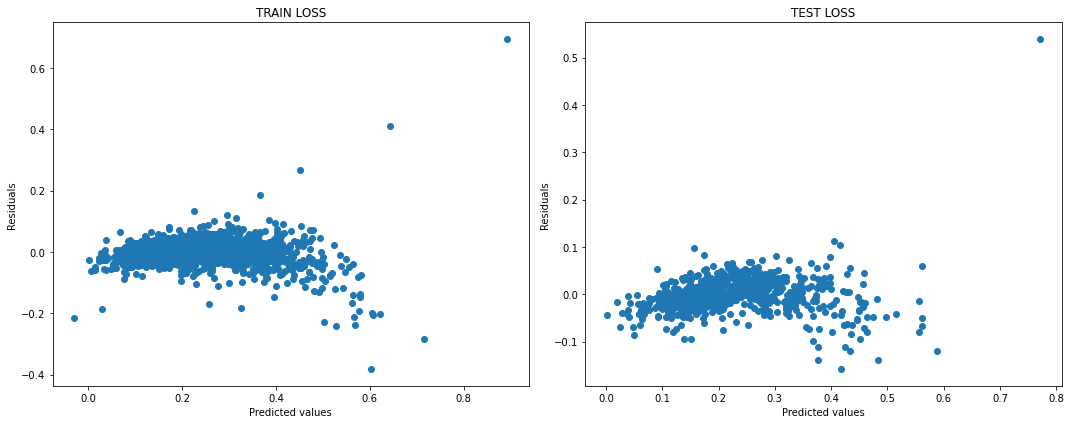

In [154]:
# Plot residuals For train data
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, y_train_pred - y_train)
plt.title("TRAIN LOSS")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

# Plot residuals For test data
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, y_test_pred - y_test)
plt.title("TEST LOSS")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")



plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.show()

<h3>7. Regularization</h3>

<h4>7.a) Ridge regularization (L2 Penalty)</h4>

In [145]:
# Train the model
ridgeRegressorModel = Ridge(alpha = 10)
ridgeRegressorModel.fit(x_train, y_train)

# Predicting outcome
y_pred_ridge_train = ridgeRegressorModel.predict(x_train)
y_pred_ridge_test = ridgeRegressorModel.predict(x_test)

<h3>8. Performance  Evaluation</h3>

<h4>8.a) Displaying results of test predictions:</h4>

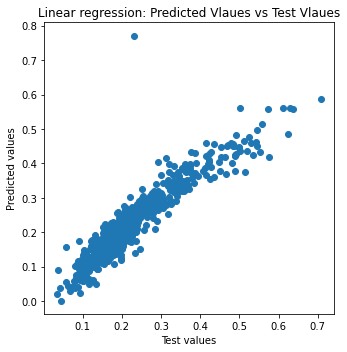

In [140]:
# Plot test vs predictions
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_test_pred)
plt.title("Linear regression: Predicted Vlaues vs Test Vlaues")
plt.xlabel("Test values")
plt.ylabel("Predicted values")
plt.show()

<h4>8.b) Calculating the evaluation Metrics:</h4>

In [141]:
# Calculating Model Metrics
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2Score = r2_score(y_test, y_test_pred)

# Displaying Results
ptbl = PrettyTable()
ptbl.field_names = ['', "Without Regularization"]
ptbl.add_row(['Intercept', round(lrModel.intercept_[0], 3)])
ptbl.add_row(['MSE', round(mse, 3)])
ptbl.add_row(['RMSE', round(rmse, 3)])
ptbl.add_row(['R2 Score', round(r2Score, 3)])
print(ptbl)

+-----------+------------------------+
|           | Without Regularization |
+-----------+------------------------+
| Intercept |         -0.027         |
|    MSE    |         0.001          |
|    RMSE   |         0.038          |
|  R2 Score |         0.867          |
+-----------+------------------------+


<h4>8.c) Best Coefficient and Intercept of the Linear Regression Model:</h4>

In [142]:
coeff_anlys = pd.DataFrame({'Name': dfFENormalized.iloc[:, :-1].columns,'Coefficient': pd.Series(lrModel.coef_[0])}).sort_values(by='Coefficient',ascending=False)
coeff_anlys.head(5)

,Name,Coefficient
41,1st Flr SF,1.338726e+10
42,2nd Flr SF,5.806488e+09
32,BsmtFin SF 1,4.409923e+09
43,Low Qual Fin SF,2.991817e+09
35,Bsmt Unf SF,1.825227e+09


- "1st Flr SF" has the Best coefficient

<h4>8.d) Intercept Value:</h4>

In [143]:
display(['Intercept', round(lrModel.intercept_[0], 3)])

['Intercept', -0.027]

<h3>9. Comparison</h3>

In [146]:
# Calculating Model Metrics for Linear Regression without Regularization
mse_trn = mean_squared_error(y_train,y_train_pred)
rmse_trn = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2Score_trn = r2_score(y_train, y_train_pred)

mse_tst = mean_squared_error(y_test,y_test_pred)
rmse_tst = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2Score_tst = r2_score(y_test, y_test_pred)

# Calculating Model Metrics for Linear Regression with Ridge Regularization
mse_ridge_trn = mean_squared_error(y_train, y_pred_ridge_train)
rmse_ridge_trn = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
r2Score_ridge_trn = r2_score(y_train, y_pred_ridge_train)

mse_ridge_tst = mean_squared_error(y_test ,y_pred_ridge_test)
rmse_ridge_tst = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))
r2Score_ridge_tst = r2_score(y_test, y_pred_ridge_test)

# Displaying Results
ptbl = PrettyTable()
ptbl.field_names = ['', "Train (LR)", "Test (LR)", "Train (Ridge)", "Test (Ridge)"]
ptbl.add_row(['MSE', round(mse_trn, 3), round(mse_tst, 3), round(mse_ridge_trn, 3), round(mse_ridge_tst, 3)])
ptbl.add_row(['RMSE', round(rmse_trn, 3), round(rmse_tst, 3), round(rmse_ridge_trn, 3), round(rmse_ridge_tst, 3)])
ptbl.add_row(['R2 Score', round(r2Score_trn, 3), round(r2Score_tst, 3), round(r2Score_ridge_trn, 3), round(r2Score_ridge_tst, 3)])
print(ptbl)

+----------+------------+-----------+---------------+--------------+
|          | Train (LR) | Test (LR) | Train (Ridge) | Test (Ridge) |
+----------+------------+-----------+---------------+--------------+
|   MSE    |   0.002    |   0.001   |     0.002     |    0.001     |
|   RMSE   |    0.04    |   0.038   |     0.042     |    0.038     |
| R2 Score |   0.863    |   0.867   |     0.851     |    0.868     |
+----------+------------+-----------+---------------+--------------+


<b>Findings</b>: We find that with regularisation using the Ridge Regularisation Techniques, the difference between training and test results are almost the same, indicating that we eliminated most of the overfitting.